In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
cust_df = pd.read_csv('Mall_Customers.csv', index_col=0)

In [3]:
cust_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
cust_df.shape

(200, 4)

In [5]:
cust_df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [7]:
cust_df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

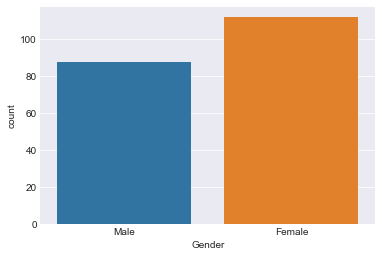

In [8]:
sns.set_style('darkgrid')
sns.countplot(cust_df['Gender'])

In [9]:
cust_df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

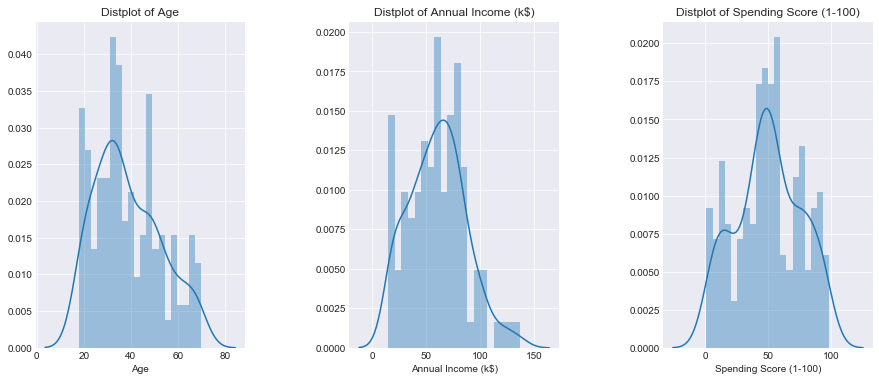

In [10]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(cust_df[x] , bins = 20)
    plt.title('Distplot of '+ x)
plt.show()

In [11]:
cust_df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


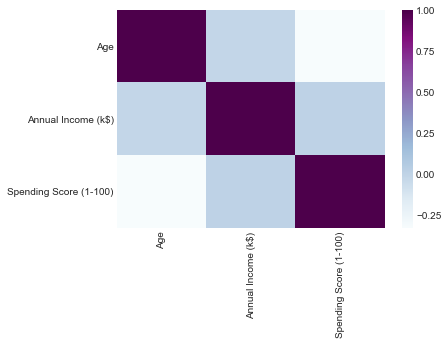

In [12]:
sns.heatmap(cust_df.corr(), cmap="BuPu")

### Clusters based on Age and Spending Score

Text(0,0.5,'Spending Score (1-100)')

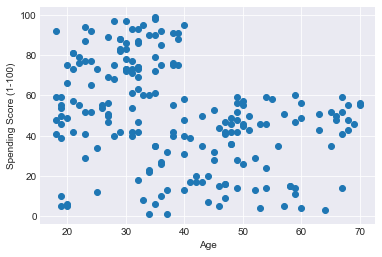

In [13]:
plt.scatter(x=cust_df['Age'], y=cust_df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

In [14]:
cluster_data1 = cust_df[['Age' , 'Spending Score (1-100)']].values
cluster_data1[:5]

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40]], dtype=int64)

In [15]:
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(cluster_data1)
scaled_data1[:5]

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992]])

In [16]:
# We will use elbow method to identify appropriate number of clusters

kmeans_kwargs = {'init': 'k-means++',
                'n_init': 10,
                'max_iter': 300,
                'random_state': 101}

# Compute within cluster sum-square error for each iteration
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(scaled_data1)
    wcss.append(kmeans.inertia_)

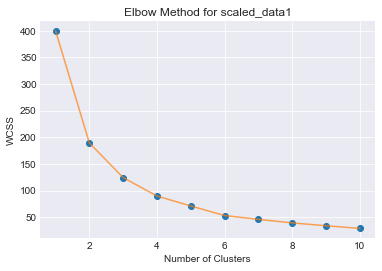

In [17]:
plt.plot(range(1, 11), wcss, 'o')
plt.plot(range(1, 11), wcss, '-', alpha=0.7)
plt.title('Elbow Method for scaled_data1')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
# Elbow found at k = 4

In [19]:
kmeans_age_ss = KMeans(n_clusters=4, **kmeans_kwargs)
pred1 = kmeans_age_ss.fit_predict(scaled_data1)

Text(0,0.5,'Spending Score (1-100)')

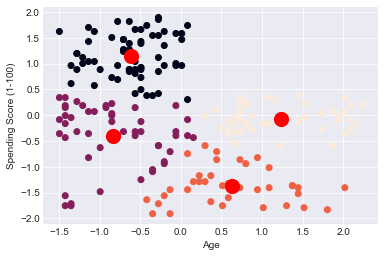

In [20]:
plt.scatter(scaled_data1[:,0], scaled_data1[:,1], c=kmeans_age_ss.labels_.astype(float))
plt.scatter(kmeans_age_ss.cluster_centers_[:,0], kmeans_age_ss.cluster_centers_[:,1], s=200, c='red')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

### Clusters based on Annual Income and Spending Score

Text(0,0.5,'Spending Score (1-100)')

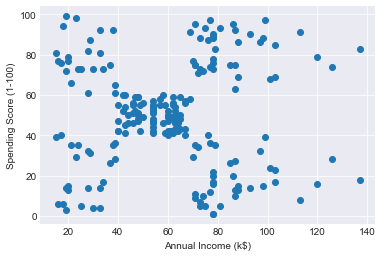

In [21]:
plt.scatter(x=cust_df['Annual Income (k$)'], y=cust_df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [22]:
cluster_data2 = cust_df[['Annual Income (k$)' , 'Spending Score (1-100)']].values
cluster_data2[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [23]:
scaled_data2 = scaler.fit_transform(cluster_data2)
scaled_data2[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [24]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(scaled_data2)
    wcss.append(kmeans.inertia_)

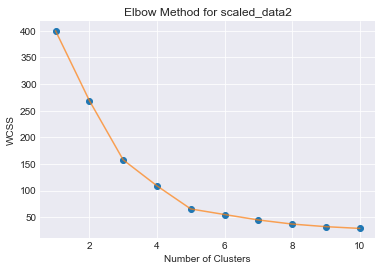

In [25]:
plt.plot(range(1, 11), wcss, 'o')
plt.plot(range(1, 11), wcss, '-', alpha=0.7)
plt.title('Elbow Method for scaled_data2')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
# Elbow found at k = 5

In [27]:
kmeans_ai_ss = KMeans(n_clusters=5, **kmeans_kwargs)
pred2 = kmeans_ai_ss.fit_predict(scaled_data2)

Text(0,0.5,'Spending Score (1-100)')

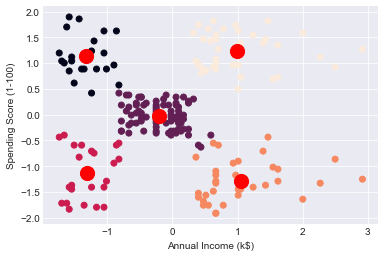

In [28]:
plt.scatter(scaled_data2[:,0], scaled_data2[:,1], c=kmeans_ai_ss.labels_.astype(float))
plt.scatter(kmeans_ai_ss.cluster_centers_[:,0], kmeans_ai_ss.cluster_centers_[:,1], s=200, c='red')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

### Clusters based on Age and Annual Income

Text(0,0.5,'Annual Income (k$)')

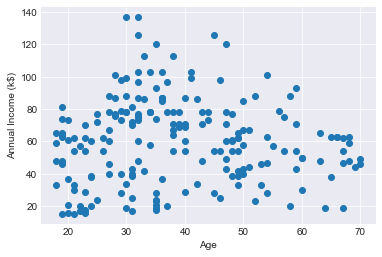

In [45]:
plt.scatter(x=cust_df['Age'], y=cust_df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

In [30]:
cluster_data3 = cust_df[['Age', 'Annual Income (k$)']].values
cluster_data3[:5]

array([[19, 15],
       [21, 15],
       [20, 16],
       [23, 16],
       [31, 17]], dtype=int64)

In [31]:
scaled_data3 = scaler.fit_transform(cluster_data3)
scaled_data3[:5]

array([[-1.42456879, -1.73899919],
       [-1.28103541, -1.73899919],
       [-1.3528021 , -1.70082976],
       [-1.13750203, -1.70082976],
       [-0.56336851, -1.66266033]])

In [32]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(scaled_data3)
    wcss.append(kmeans.inertia_)

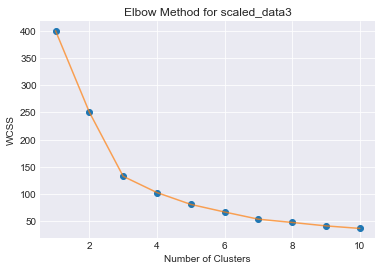

In [33]:
plt.plot(range(1, 11), wcss, 'o')
plt.plot(range(1, 11), wcss, '-', alpha=0.7)
plt.title('Elbow Method for scaled_data3')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
# Elbow found at k = 3

In [35]:
kmeans_age_ai = KMeans(n_clusters=3, **kmeans_kwargs)
pred3 = kmeans_age_ai.fit_predict(scaled_data3)

Text(0,0.5,'Annual Income (k$)')

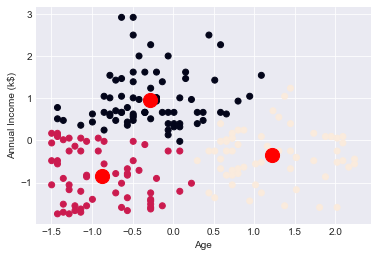

In [36]:
plt.scatter(scaled_data3[:,0], scaled_data3[:,1], c=kmeans_age_ai.labels_.astype(float))
plt.scatter(kmeans_age_ai.cluster_centers_[:,0], kmeans_age_ai.cluster_centers_[:,1], s=200, c='red')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

### Clusters based on Age, Annual Income and Spending Score

Text(0.5,0,'Spending Score (1-100)')

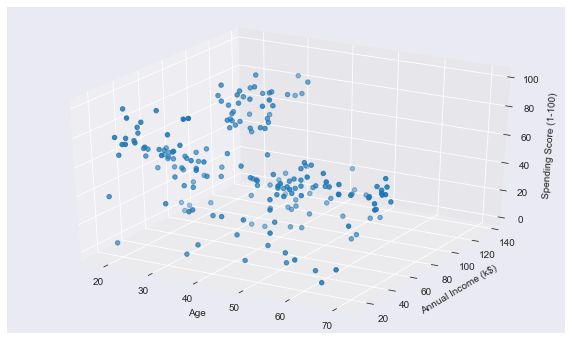

In [37]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cust_df['Age'], cust_df['Annual Income (k$)'], cust_df['Spending Score (1-100)'])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

In [38]:
cluster_data4 = cust_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
cluster_data4[:5]

array([[19, 15, 39],
       [21, 15, 81],
       [20, 16,  6],
       [23, 16, 77],
       [31, 17, 40]], dtype=int64)

In [39]:
scaled_data4 = scaler.fit_transform(cluster_data4)
scaled_data4[:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

In [40]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(scaled_data4)
    wcss.append(kmeans.inertia_)

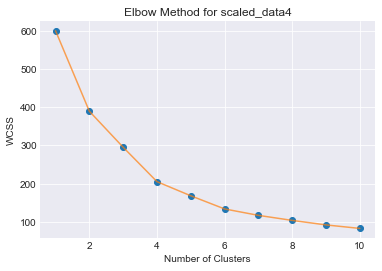

In [41]:
plt.plot(range(1, 11), wcss, 'o')
plt.plot(range(1, 11), wcss, '-', alpha=0.7)
plt.title('Elbow Method for scaled_data4')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
# Elbow found at k = 6

In [43]:
kmeans_age_ai_ss = KMeans(n_clusters=6, **kmeans_kwargs)
pred4 = kmeans_age_ai_ss.fit_predict(scaled_data4)

Text(0.5,0,'Spending Score (1-100)')

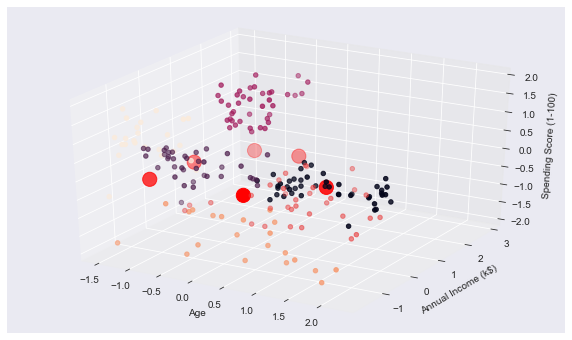

In [44]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_data4[:,0], scaled_data4[:,1], scaled_data4[:,2], c=kmeans_age_ai_ss.labels_.astype(float))
ax.scatter(kmeans_age_ai_ss.cluster_centers_[:,0], kmeans_age_ai_ss.cluster_centers_[:,1], s=200, c='red')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')